In [2]:
from firebase_admin import firestore

# Initialize Firestore client
db = firestore.Client.from_service_account_json("C:\WS\PlantWater\src\sensor\serviceAccountKey.json")
PLANTS_COLLECTION = 'plants'
DATA_COLLECTION = 'data'

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\weidn\AppData\Local\Temp\ipykernel_11044\3866779938.py:4: SyntaxWarning: invalid escape sequence '\W'
  db = firestore.Client.from_service_account_json("C:\WS\PlantWater\src\sensor\serviceAccountKey.json")


In [3]:
import pandas as pd

import matplotlib.pyplot as plt

# Fetch data for the first plant
plant_ref = db.collection(PLANTS_COLLECTION).limit(1).get()[0]
plant_id = plant_ref.id

# Fetch data for the plant
data_ref = db.collection(PLANTS_COLLECTION).document(plant_id).collection(DATA_COLLECTION)
data = data_ref.stream()

# Convert data to a DataFrame
data_list = []
for doc in data:
    doc_dict = doc.to_dict()
    doc_dict['timestamp'] = doc_dict['timestamp']
    data_list.append(doc_dict)



RetryError: Timeout of 300.0s exceeded, last exception: 429 Quota exceeded.

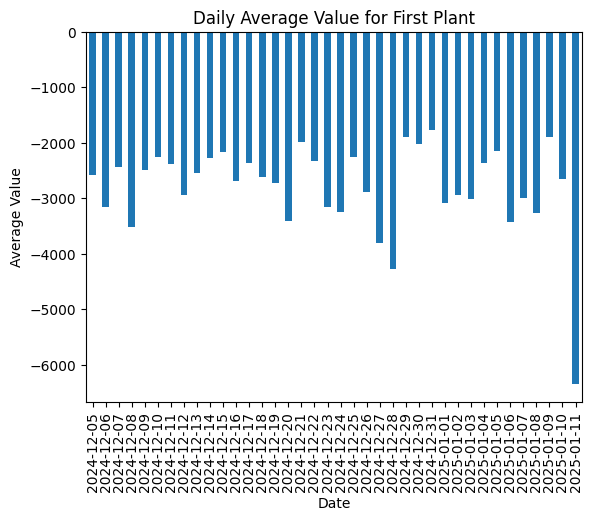

In [15]:
df = pd.DataFrame(data_list)

# Average the value per day
df['date'] = df['timestamp'].dt.date
daily_avg = df.groupby('date')['value'].mean()

# Plot the data
daily_avg.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Daily Average Value for First Plant')
plt.show()

In [1]:
df.sort_values(by='timestamp', inplace=True, ascending=False)
# Filter data for the specific date
oneday = df[df['date'] == pd.to_datetime('2025-01-03').date()]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(oneday['timestamp'], oneday['value'], marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Values on 2025-01-01')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


NameError: name 'df' is not defined

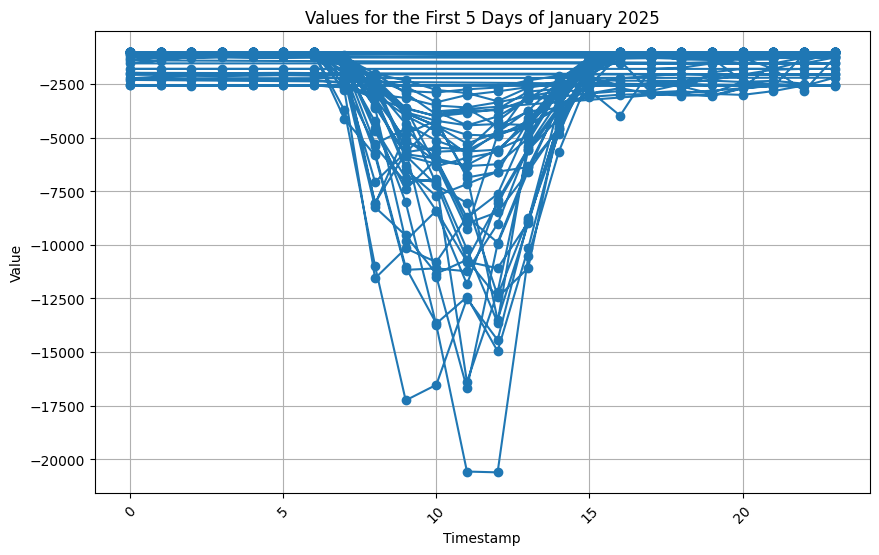

In [ ]:
# Filter data for the first five days of January
january_first_five_days = df[(df['date'] >= pd.to_datetime('2025-01-01').date()) & (df['date'] <= pd.to_datetime('2025-01-05').date())]

# Aggregate data by hour
january_first_five_days['hour'] = january_first_five_days['timestamp'].dt.hour
hourly_avg = january_first_five_days.groupby(['date', 'hour'])['value'].mean().unstack(level=0)

# Plot the data
hourly_avg.plot(kind='line', figsize=(12, 8))
plt.xlabel('Hour')
plt.ylabel('Average Value')
plt.title('Hourly Average Value for the First Five Days of January')
plt.legend(title='Date')
plt.grid(True)
plt.show()